3.


In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt


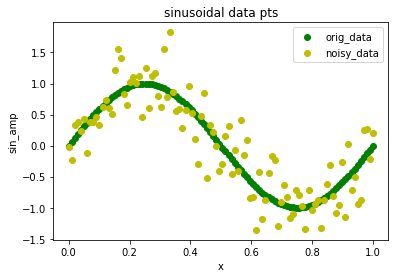

In [ ]:
def data_pts(dp):
  ###############Generate data points##########################
  x=np.linspace(0,1,dp)
  n=np.random.normal(0,np.sqrt(0.1),dp)
  xs=np.sin(2*np.pi*x)
  xs_n=xs+n

  return x,xs,xs_n

N=100
x,t,tnoi=data_pts(N)
plt.title("sinusoidal data pts")
plt.scatter(x,t,c='g',label='orig_data')
plt.scatter(x,tnoi,c='y',label='noisy_data')
plt.xlabel("x")
plt.ylabel("sin_amp")
plt.legend()


In [ ]:

#Complete the below linear regression function
def w_opt(X_train,Y_train,lamda):
  #print(X_train.shape,Y_train.shape)
  dp=len(X_train)
  Y=np.reshape((Y_train),(dp,1))
  X=np.reshape((X_train),(dp,1))
 
  #print(X.shape,Y.shape)
  a_1=np.matmul(X.T,X)
  I=np.identity(len(a_1))
  a12=a_1+lamda*I
  #print(a12)
  a1=np.linalg.inv((a12))
  a2=np.matmul(X.T,Y)
  #print(np.shape(a_1),np.shape(a1),np.shape(a2))
  w_opt=np.matmul(a1,a2)
  return w_opt



w_op_lr=w_opt(x,tnoi,np.exp(-18))

def PolynomialPred(w_est,X_train,Y_train,lmbda):
  t_es_tr=0
  t_es_te=0
  t_es_tr=w_est*(X_train)

  loss_tr=np.inner(t_es_tr - Y_train,t_es_tr - Y_train)+ lmbda*np.inner(w_est,w_est)

  return loss_tr,t_es_tr

TrainError_rms,t_es_tr = PolynomialPred(w_op_lr,x,tnoi,np.exp(-18))
estim=np.array((np.ravel((t_es_tr))))



In [ ]:
#####kernel ridge regression

#Complete the below linear regression function
def alpha_opt(X_train,Y_train,lamda,k_name,con,st):
  dp=len(X_train)
  Y=np.reshape((Y_train),(dp,1))
  X=np.reshape((X_train),(dp,1))
  K=np.zeros((dp,dp),float)
  for i in range(dp):
    for j in range(dp):
      K[i,j]=kernel(k_name,Y[i],Y[j],con,st)
  
  I=np.identity(len(K))
  t1=K+lamda*I
  #print(t1)
  t2=np.linalg.inv((t1))
  t3=np.matmul(K,Y)
  #print(np.shape(K),np.shape(t2),np.shape(t3))
  alp_opt=np.matmul(t2,t3)
  return alp_opt,K

def kernel(k,xi,yi,c,std):

  if k=="linear":
    return xi.T@yi + c
  
  elif k=="rbf":
      #print(np.exp(- std*(np.linalg.norm(xi-yi)**2)))
      return np.exp(- std*(np.linalg.norm(xi-yi)**2))
  
  elif k=="exp":
      return np.exp(- (1/ (2*std**2)) * np.linalg.norm(xi-yi))
  
  
  elif k=="poly":
      return ((xi.T@yi) + c)**std
  
  elif k=="sigmoid":
      return np.tanh(std * (xi.T@yi) + c)
  
   
#Estimate optimal weight's using "LinearRegression" function
al_opt,K_mat_tr=alpha_opt(x,tnoi,np.exp(-18),"rbf",0,0.01)
#print(al_opt)

#Complete the function
def Ker_Pred(a_est,X_train,Y_train,lmbda,K_mat_tr,k_name,con,st):
  kt_es_tr=0
  kt_es_te=0
  kt_es_tr=np.matmul(K_mat_tr,a_est)
  kloss_tr=np.inner(kt_es_tr - Y_train,kt_es_tr - Y_train)+ lmbda*np.inner(a_est,a_est)
  return kloss_tr,kt_es_tr





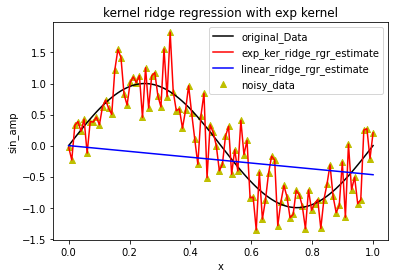

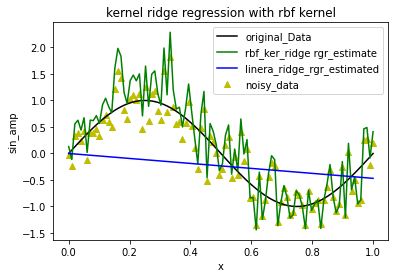

In [ ]:
c1,a1=1,0.001
ker1="exp"
al_opt1,K_mat_tr1=alpha_opt(x,tnoi,np.exp(-18),ker1,c1,a1)

kTrainError_rms1,kt_es_tr1=Ker_Pred(al_opt1,x,tnoi,np.exp(-18),K_mat_tr1,ker1,c1,a1)
kestim1=np.array((np.ravel(((kt_es_tr1)))))

plt.scatter(x,tnoi,c='y',marker='^',label='noisy_data')
plt.title("kernel ridge regression with exp kernel")
plt.plot(x,t,c='k',label='original_Data')
plt.plot(x,kestim1,'r',label='exp_ker_ridge_rgr_estimate')
plt.plot(x,estim,'b',label='linear_ridge_rgr_estimate')
plt.xlabel("x")
plt.ylabel("sin_amp")
plt.legend()
plt.show()
ker2="rbf"
kTrainError_rms2,kt_es_tr2=Ker_Pred(al_opt,x,tnoi,np.exp(-18),K_mat_tr,ker2,0,0.01)
kestim2=np.array((np.ravel(((kt_es_tr2)))))

plt.scatter(x,tnoi,c='y',marker='^',label='noisy_data')
plt.title("kernel ridge regression with rbf kernel")
plt.plot(x,t,c='k',label='original_Data')
plt.plot(x,kestim2,'g',label='rbf_ker_ridge rgr_estimate')
plt.plot(x,estim,'b',label='linera_ridge_rgr_estimated')
plt.xlabel("x")
plt.ylabel("sin_amp")
plt.legend()
plt.show()
##########################################
#clearly the below plots shows the benefit of using kernel ridge regression which fits the noisy sinusoidal data points while a linear ridge regression estimates doesn't.


4.

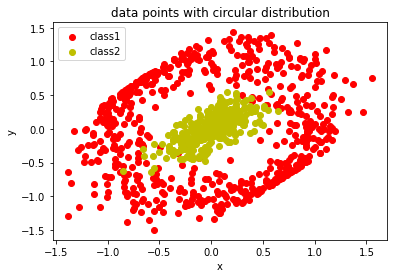

In [ ]:
##pca and kernel pca
########     data points generation   ########################
### data points corresponding to two concentric circles with different radius are genreated.
##### the data points of the outer cirlce is considered as class 1 data points 
##### the data points of the inner cirlce is considered as class 2 data points 
##### the equation a^2+b^2=r^2 is used to generate these points where a=r*cos(theta),b= r*sin(theta) with some added gaussian random noise
n1 = 600
gn1=noise=np.random.normal(0,0.2,size=n1)
# make a simple unit circle 
theta = np.linspace(0, 2*np.pi, n1)
a, b = 1 * np.cos(theta)+gn1, 1 * np.sin(theta)+gn1
data1=np.hstack((a.reshape((n1,1)),b.reshape((n1,1))))
n2 = 300
gn2=noise=np.random.normal(0,0.2,size=n2) 
theta2 = np.linspace(0, 2*np.pi, n2)
r = np.random.rand(n2)/(np.pi)
x, y = r* np.cos(theta2)+gn2, r * np.sin(theta2)+gn2
data2=np.hstack((x.reshape((n2,1)),y.reshape((n2,1))))
data=np.vstack((data1,data2))

# plots
plt.figure()
plt.scatter(data[0:n1,0],data[0:n1,1],c='r',label='class1')
plt.scatter(data[n1:,0],data[n1:,1],c='y',label='class2')
plt.title("data points with circular distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
from scipy.linalg import eigh

def lin_pca(datap, n_cmp): 
  X_m = datap- np.mean(datap , axis=0)
  #print(X_m.shape)
  cov_mat = np.cov(X_m)
  #print("c",cov_mat.shape)
  eval_l , evec_l = eigh(cov_mat)
  X_pcmp_l = np.column_stack((evec_l[:,-i] for i in range(1,n_cmp+1)))
  return X_pcmp_l,cov_mat

def ker_pca(datap, kern, n_cmp):
  gamma=15
  c=1
  K_pca=np.zeros((n1+n2,n1+n2),float)
  for i in range(n1+n2):
    for j in range(n1+n2):
      #print(datap[i,:],datap[j,:])
      K_pca[i,j]=kernel(kern,datap[i,:],datap[j,:],c,gamma)
  #print(K_pca[3,2],K_pca[2,3],K_pca[1,:]-K_pca[:,1].T)
  n = K_pca.shape[0]
  #print("k",K_pca.shape)
  I_n = np.ones((n,n)) / n
  K = K_pca - np.matmul(I_n,K_pca) - np.matmul(K_pca,I_n) + np.matmul(I_n,np.matmul(K_pca,I_n))
  evals, evecs = eigh(K)
  
  X_pcmp = np.column_stack((evecs[:,-i] for i in range(1,n_cmp+1)))
  return X_pcmp,K

(900, 900)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


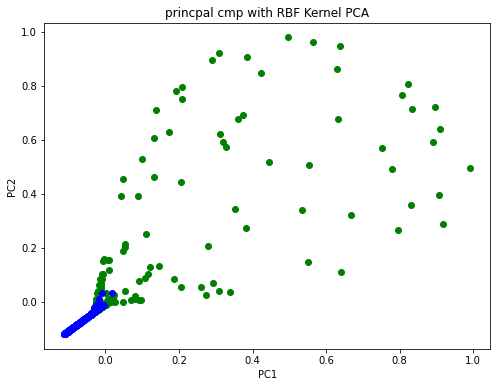

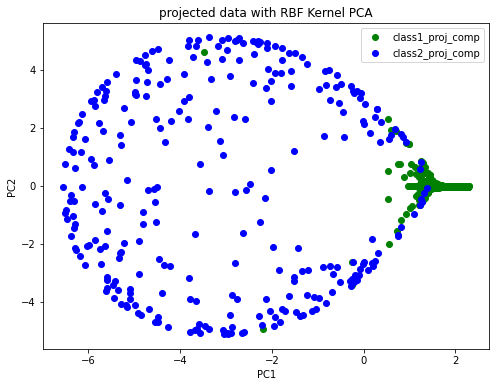

In [ ]:
KP,X_pc = ker_pca(data,"rbf",2)
print(X_pc.shape)
plt.figure(figsize=(8,6))
plt.scatter(X_pc[0:n1, 0], X_pc[0:n1, 1], color='g', label='class1_prin_comp')
plt.scatter(X_pc[n1:, 0], X_pc[n1:, 1], color='blue', label='class2_prin_comp')
plt.title('princpal cmp with RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
f1=X_pc@KP
plt.figure(figsize=(8,6))
plt.scatter(f1[0:n1, 0], f1[0:n1, 1], color='g', label='class1_proj_comp')
plt.scatter(f1[n1:, 0], f1[n1:, 1], color='blue', label='class2_proj_comp')
plt.title('projected data with RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if __name__ == '__main__':


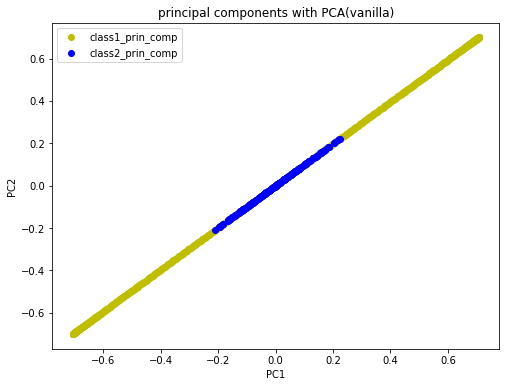

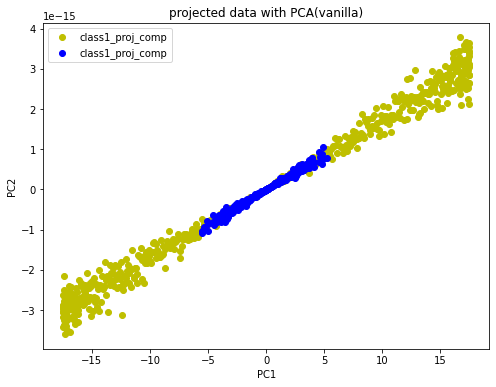

In [ ]:
co,X_pcl = lin_pca(data,2)

plt.figure(figsize=(8,6))
plt.scatter(X_pcl[0:n1, 0], X_pcl[0:n1, 1], color='y', label='class1_prin_comp')
plt.scatter(X_pcl[n1:, 0], X_pcl[n1:, 1], color='blue', label='class2_prin_comp')
plt.title('principal components with PCA(vanilla)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

f2=X_pcl@co
plt.figure(figsize=(8,6))
plt.scatter(f2[0:n1, 0], f2[0:n1, 1], color='y',label='class1_proj_comp')
plt.scatter(f2[n1:, 0], f2[n1:, 1], color='blue', label='class1_proj_comp')
plt.title('projected data with PCA(vanilla)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

########## from the plots of projected data using kernel pca and vanilla pca, it is clear that pca(vanilla) cannot linearly classify the non linear data that was generated
########## while the kernel PCA can linearly classify the non-linear data that was generated, which tells the importance of kernel PCA  